In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import requests
session = requests.Session()

In [9]:
temp=pd.read_csv("malicious_phish.csv")
temp.shape

(651191, 2)

In [10]:
temp.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [11]:
temp["type"].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [12]:
benign_urls = temp[temp["type"] == "benign"][:2500]
benign_urls = pd.DataFrame(benign_urls)

In [13]:
defacement_urls = temp[temp["type"] == "defacement"][:2500]  
defacement_urls = pd.DataFrame(defacement_urls)

In [14]:
phishing_urls = temp[temp["type"] == "phishing"][:2500]
phishing_urls = pd.DataFrame(phishing_urls)

In [15]:
malware_urls = temp[temp["type"] == "malware"][:2500]
malware_urls = pd.DataFrame(malware_urls)

In [16]:
data=pd.concat([benign_urls,defacement_urls,phishing_urls,malware_urls],ignore_index=True).sample(n=10000,ignore_index=True)

In [17]:
data.head()

,url,type
0,applehelpinformationaccounts.com,phishing
1,http://pastehtml.com/view/1efyb9g.html,phishing
2,http://3cf.ru/2015/07/21/ykrainskie-komplektyu...,malware
3,appie-assist.com,phishing
4,http://www.vnic.co/mua-ban/mua-ban-nha-o-nha-x...,defacement


In [18]:
data["type"].value_counts()

type
phishing      2500
malware       2500
defacement    2500
benign        2500
Name: count, dtype: int64

In [19]:
# word cloud 

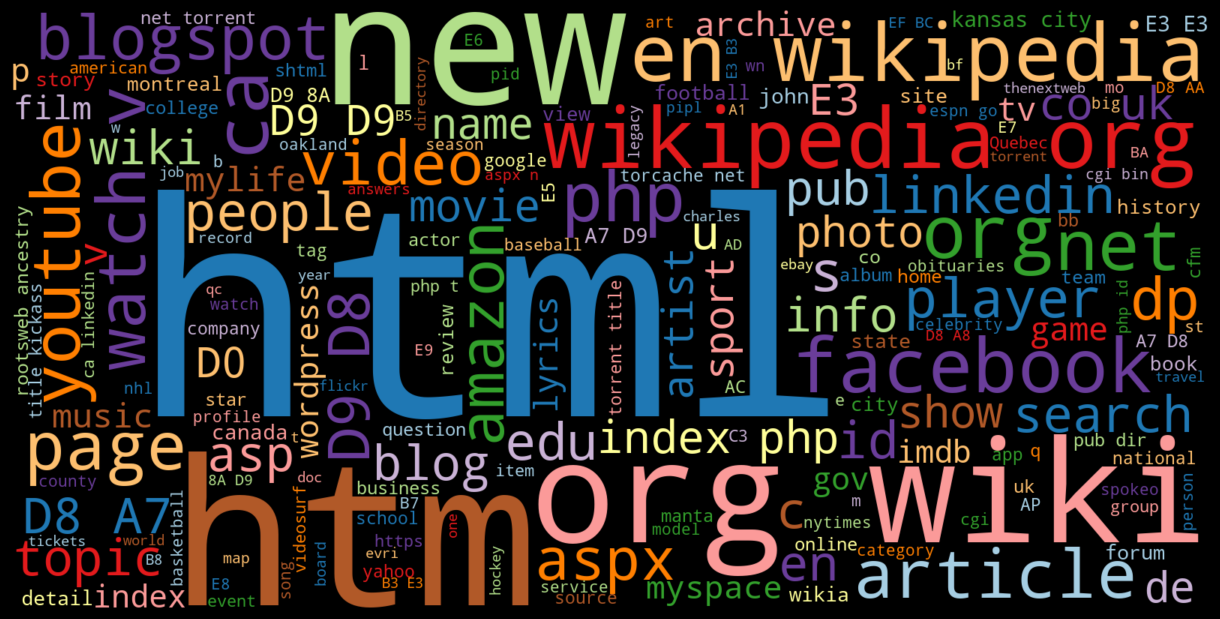

In [20]:
result = " ".join(i for i in data[data["type"] == "benign"]["url"])
wordcloud = WordCloud(width=1600, height=800,
                      colormap='Paired').generate(result)
plt.figure(figsize=(12, 14), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

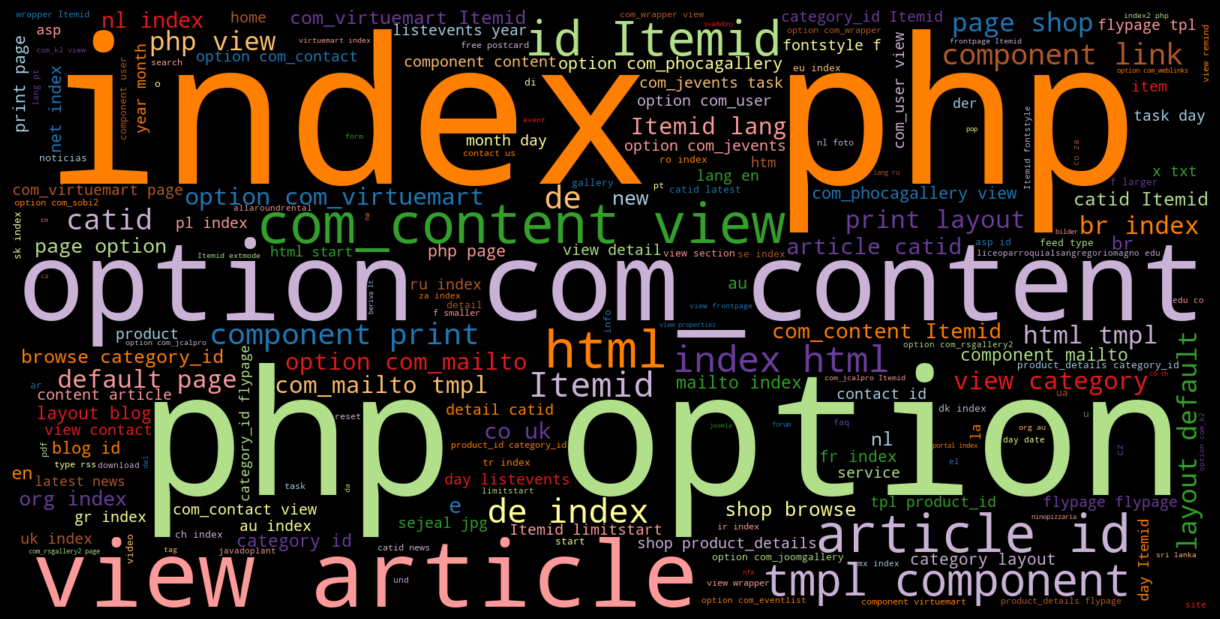

In [21]:
result = " ".join(i for i in data[data["type"] == "defacement"]["url"])
wordcloud = WordCloud(width=1600, height=800,
                      colormap='Paired').generate(result)
plt.figure(figsize=(12, 14), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

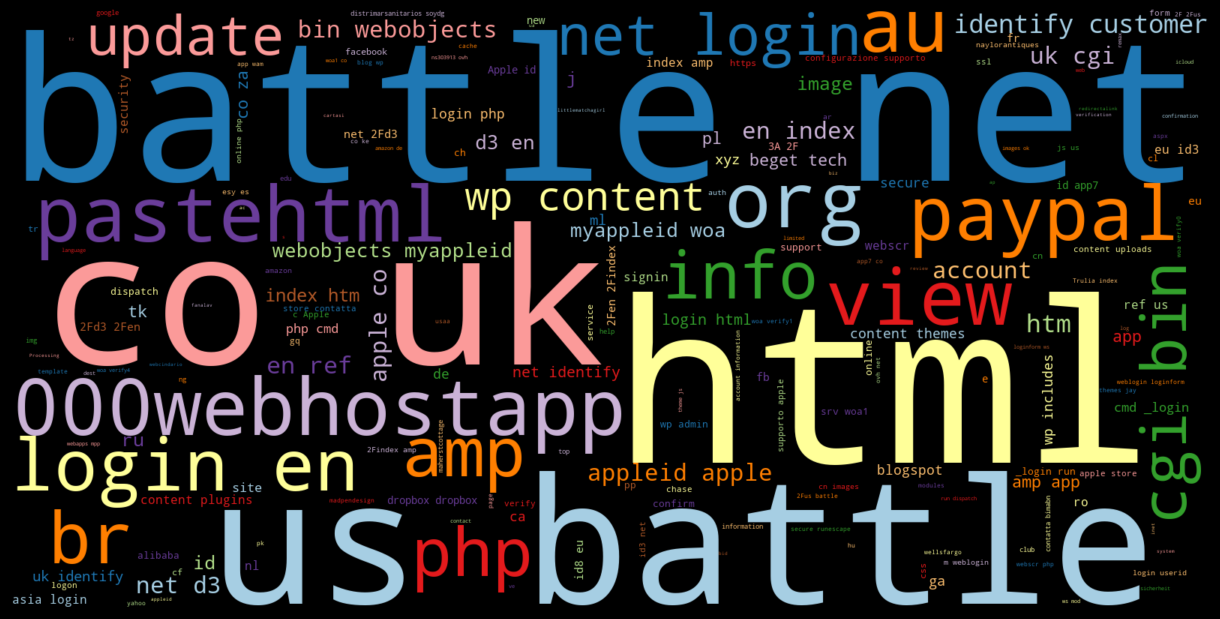

In [22]:
result = " ".join(i for i in data[data["type"] == "phishing"]["url"])
wordcloud = WordCloud(width=1600, height=800,
                      colormap='Paired').generate(result)
plt.figure(figsize=(12, 14), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

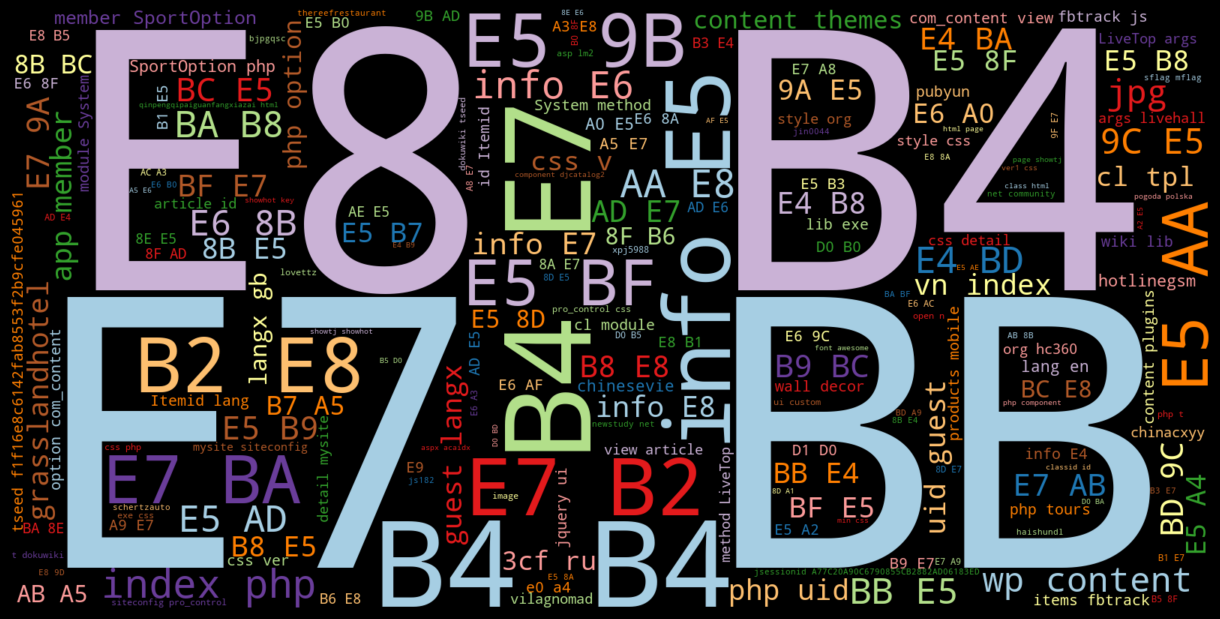

In [23]:
result = " ".join(i for i in data[data["type"] == "malware"]["url"])
wordcloud = WordCloud(width=1600, height=800,
                      colormap='Paired').generate(result)
plt.figure(figsize=(12, 14), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Feature Extraction

In [28]:
import re
import whois
import ipaddress
import tldextract
from datetime import datetime
from urllib.parse import urlparse, urlencode

In [29]:
# 1.Checks for IP address in URL (Have_IP)

def havingIP(url):
    try:
        ipaddress.ip_address(url)
        ip = 1
    except:
        ip = 0
    return ip

In [30]:
# 2. Checking for Shortening Services in URL (Tiny_URL)

shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    match = re.search(shortening_services, url)
    if match:
        return 1
    else:
        return 0

In [31]:
# 3.Checking for redirection '//' in the url (Redirection)

def redirection(url):
    pos = url.rfind('//')
    if pos > 6:
        if pos > 7:
            return 1
        else:
            return 0
    else:
        return 0

In [32]:
# 4. count '@' 

def count_at(url):
    return url.count('@')

In [33]:
# 5. Count 'www' 

def count_www(url):
    return url.count('www')

In [34]:
# 6. Count '/' 

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

In [35]:
# 7. Count 'https' 

def count_https(url):
    return url.count('https')

In [36]:
# 8. Count 'http' 

def count_http(url):
    return url.count('http')

In [37]:
# 9. Count 'http' 

def count_per(url):
    return url.count('%')

In [38]:
# 10. Count '-' 

def count_hyphen(url):
    return url.count('-')

In [39]:
# 11. Count '=' 

def count_equal(url):
    return url.count('=')

In [40]:
# 12. Length of the url

def url_length(url):
    return len(str(url))

In [41]:
# 13. Hostname length

def hostname_length(url):
    return len(urlparse(url).netloc)

In [42]:
# 14. No of digits in url

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [43]:
# 14. No of letters in url

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [44]:
# HTML and JavaScript based Features

In [45]:
# 1. IFrame Redirection (iFrame)

def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [46]:
# 2.Checks the effect of mouse over on status bar (Mouse_Over)

def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [47]:
# 3.Checks the status of the right click attribute (Right_Click)

def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [48]:
# 4.Checks the number of forwardings (Web_Forwards)

def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

In [49]:
# Domain based features

In [50]:
# 1.whois dns record

def dnsRecord(url):
    dns = 0
    try:
        domain_name = whois.whois(urlparse(url).netloc)
    except:
        dns = 1
    return dns

In [51]:
# 2.Survival time of domain: The difference between termination time and creation time (Domain_Age)

dns = 0
try:
    domain_name = whois.whois(urlparse(url).netloc)
except:
    dns = 1


def domainAge(domain_name):
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date
    if (isinstance(creation_date, str) or isinstance(expiration_date, str)):
        try:
            creation_date = datetime.strptime(creation_date, '%Y-%m-%d')
            expiration_date = datetime.strptime(expiration_date, "%Y-%m-%d")
        except:
            return 1
    if ((expiration_date is None) or (creation_date is None)):
        return 1
    elif ((type(expiration_date) is list) or (type(creation_date) is list)):
        return 1
    else:
        ageofdomain = abs((expiration_date - creation_date).days)
        if ((ageofdomain/30) < 6):
            age = 1
        else:
            age = 0
    return age

In [52]:
# 3.End time of domain: The difference between termination time and current time (Domain_End)

def domainEnd(domain_name):
    expiration_date = domain_name.expiration_date
    if isinstance(expiration_date, str):
        try:
            expiration_date = datetime.strptime(expiration_date, "%Y-%m-%d")
        except:
            return 1
    if (expiration_date is None):
        return 1
    elif (type(expiration_date) is list):
        return 1
    else:
        today = datetime.now()
        end = abs((expiration_date - today).days)
        if ((end/30) < 6):
            end = 0
        else:
            end = 1
    return end

In [53]:
# Function to extract features
def featureExtraction(url):

    features = []
    # Address bar based features (15)

    features.append(havingIP(url))
    features.append(tinyURL(url))
    features.append(redirection(url))
    features.append(count_at(url))
    features.append(count_www(url))
    features.append(no_of_dir(url))
    features.append(count_https(url))
    features.append(count_http(url))
    features.append(count_per(url))
    features.append(count_hyphen(url))
    features.append(count_equal(url))
    features.append(url_length(url))
    features.append(hostname_length(url))
    features.append(digit_count(url))
    features.append(letter_count(url))
    
    # Domain based features (3)
    dns = 0
    try:
        domain_name = whois.whois(urlparse(url).netloc)
        if(domain_name["domain_name"] == None):
            dns=1

    except:
        dns = 1

    features.append(dns)
    features.append(1 if dns == 1 else domainAge(domain_name))
    features.append(1 if dns == 1 else domainEnd(domain_name))

   # HTML & Javascript based features (4)
    try:
        response = session.get(url,timeout = 1)
    except:
        response = ""

    features.append(iframe(response))
    features.append(mouseOver(response))
    features.append(rightClick(response))
    features.append(forwarding(response))

    return features

In [56]:
feature_list=[]
 
for i in range(len(data)):
    
    url = data["url"][i]
    feature = featureExtraction(url)
    print(f"{i} -> {feature}")
    feature_list.append(feature)
    
feature_list

0 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 0, 0, 31, 1, 1, 1, 1, 1, 1, 1]
1 -> [0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 38, 13, 2, 29, 1, 1, 1, 0, 0, 1, 0]
2 -> [0, 0, 0, 0, 0, 5, 0, 1, 0, 11, 0, 117, 6, 9, 88, 1, 1, 1, 0, 0, 1, 0]
3 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 16, 0, 0, 14, 1, 1, 1, 1, 1, 1, 1]
4 -> [0, 0, 0, 0, 1, 2, 0, 1, 0, 6, 0, 55, 11, 0, 41, 1, 1, 1, 1, 1, 1, 1]
5 -> [0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 75, 14, 18, 46, 1, 1, 1, 1, 1, 1, 1]
6 -> [0, 0, 0, 0, 1, 4, 0, 1, 0, 1, 0, 66, 16, 19, 36, 1, 1, 1, 0, 0, 1, 0]
7 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 25, 1, 1, 1, 1, 1, 1, 1]
8 -> [0, 0, 0, 0, 0, 2, 0, 1, 21, 0, 0, 81, 9, 26, 28, 1, 1, 1, 0, 0, 1, 0]
9 -> [0, 0, 0, 0, 0, 5, 0, 1, 0, 1, 0, 56, 11, 0, 46, 1, 1, 1, 1, 1, 1, 1]
10 -> [0, 0, 0, 0, 0, 3, 0, 1, 0, 9, 0, 88, 7, 5, 67, 1, 1, 1, 0, 0, 1, 0]
11 -> [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 4, 89, 23, 5, 67, 1, 1, 1, 0, 0, 1, 0]
12 -> [0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 3, 67, 13, 3, 51, 1, 1, 1, 0, 0, 1, 0]
13 -> [0, 0, 0, 0, 0, 

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 0, 0, 31, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 38, 13, 2, 29, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 5, 0, 1, 0, 11, 0, 117, 6, 9, 88, 1, 1, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 16, 0, 0, 14, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 2, 0, 1, 0, 6, 0, 55, 11, 0, 41, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 75, 14, 18, 46, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 4, 0, 1, 0, 1, 0, 66, 16, 19, 36, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 25, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 2, 0, 1, 21, 0, 0, 81, 9, 26, 28, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 5, 0, 1, 0, 1, 0, 56, 11, 0, 46, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 3, 0, 1, 0, 9, 0, 88, 7, 5, 67, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 4, 89, 23, 5, 67, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 3, 67, 13, 3, 51, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 68, 18, 1, 55, 1, 1, 1, 1, 1,

In [57]:
columns=["havingIP","tinyURL","redirection","count_at","count_www","no_of_dir","count_https","count_http","count_per","count_hyphen","count_equal","url_length","hostname_length","digit_count","letter_count","dns","domainAge","domainEnd","iframe","mouseOver","rightClick","forwarding"]

In [58]:
extracted_data =  pd.DataFrame(feature_list,columns=columns)

In [59]:
extracted_data = pd.concat((extracted_data,data["type"]),axis=1)

In [61]:
extracted_data.to_csv("Final Data.csv",index=False)